In [1]:
import torch
import dill
import os.path as op
import numpy as np
import hnn_core
from hnn_core import simulate_dipole, Network, read_params, JoblibBackend
import matplotlib as mpl
import matplotlib.pyplot as plt
import sbi.utils as utils
from sbi.inference.base import infer
import multiprocessing
import datetime
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from scipy import interpolate


In [2]:
posterior_file = open('../../data/ERP/12152020_161701/posterior_ERPYes_t100_', 'rb')
posterior = dill.load(posterior_file)
posterior_file.close()

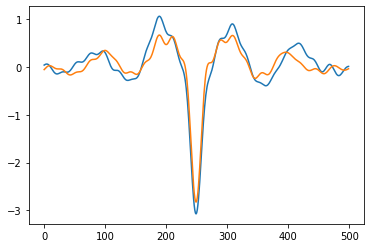

In [3]:
ERPYes = np.loadtxt('../data/ERP/ERPYes_dpl.txt', delimiter=',')
ERPNo = np.loadtxt('../data/ERP/ERPNo_dpl.txt', delimiter=',')

window = np.arange(250,750)
scaling = 1e11
conv = conv[window] * scaling
no_conv = no_conv[window] * scaling

plt.figure()
plt.plot(conv)
plt.plot(no_conv)


In [4]:
num_pts = 10001

old_x = np.linspace(0,1,len(conv))
new_x = np.linspace(0,1,num_pts)

conv_interp_func = interpolate.interp1d(old_x, conv, kind='cubic')
conv_interp = conv_interp_func(new_x)

no_conv_interp_func = interpolate.interp1d(old_x, no_conv, kind='cubic')
no_conv_interp = no_conv_interp_func(new_x)

param_low = [60000, 125, 10, 1, 1e-06, 1e-06, 135, 5, 1, 1e-06, 1e-06]
param_high = [200000, 155, 50, 20, 0.0005, 0.0005, 155, 30, 20, 0.0005, 0.0005]
limits = [[param_low[idx], param_high[idx]] for idx in range(len(param_low))]
condition = [np.mean([param_low[idx], param_high[idx]]) for idx in range(len(limits))]
param_names = ['dipole_scalefctr', 't_evprox_1', 'sigma_t_evprox_1', 'numspikes_evprox_1', 'gbar_evprox_1_L2Pyr_ampa', 'gbar_evprox_1_L5Pyr_ampa', 't_evdist_1', 'sigma_t_evdist_1', 'numspikes_evdist_1', 'gbar_evdist_1_L2Pyr_ampa', 'gbar_evdist_1_L5Pyr_ampa']


In [ ]:
samples = posterior.sample((100000,), x=conv_interp)
#log_probability = posterior.log_prob(samples, x=observation)
_ = utils.pairplot(samples, fig_size=(20,20), labels=param_names)

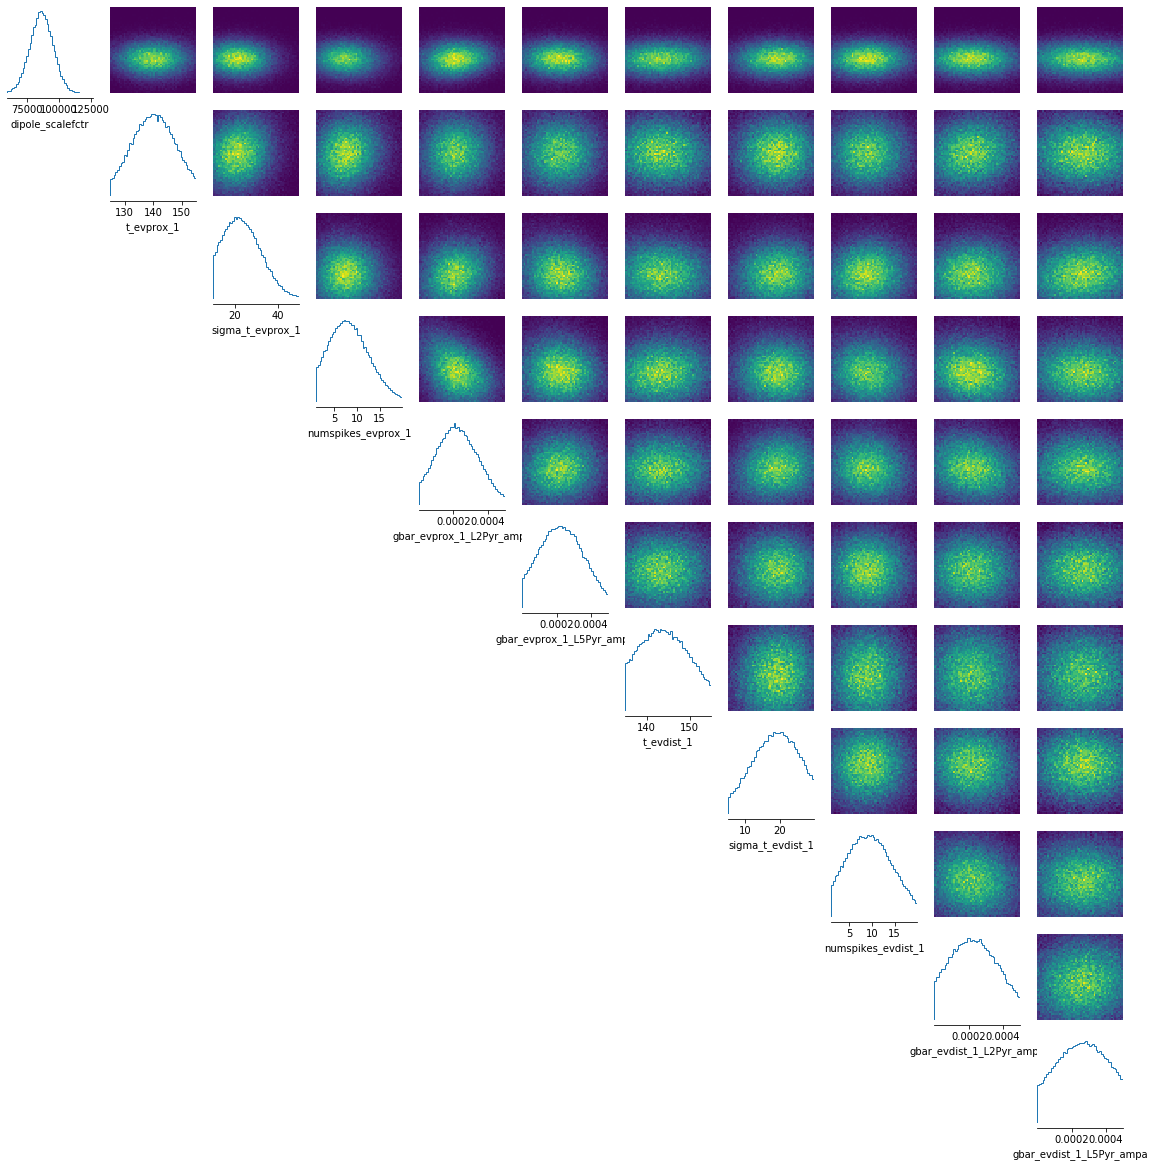

In [17]:
samples = posterior.sample((100000,), x=no_conv_interp)
#log_probability = posterior.log_prob(samples, x=observation)
_ = utils.pairplot(samples, fig_size=(20,20), labels=param_names)

In [5]:
condition = posterior.sample((1,), x=conv_interp)


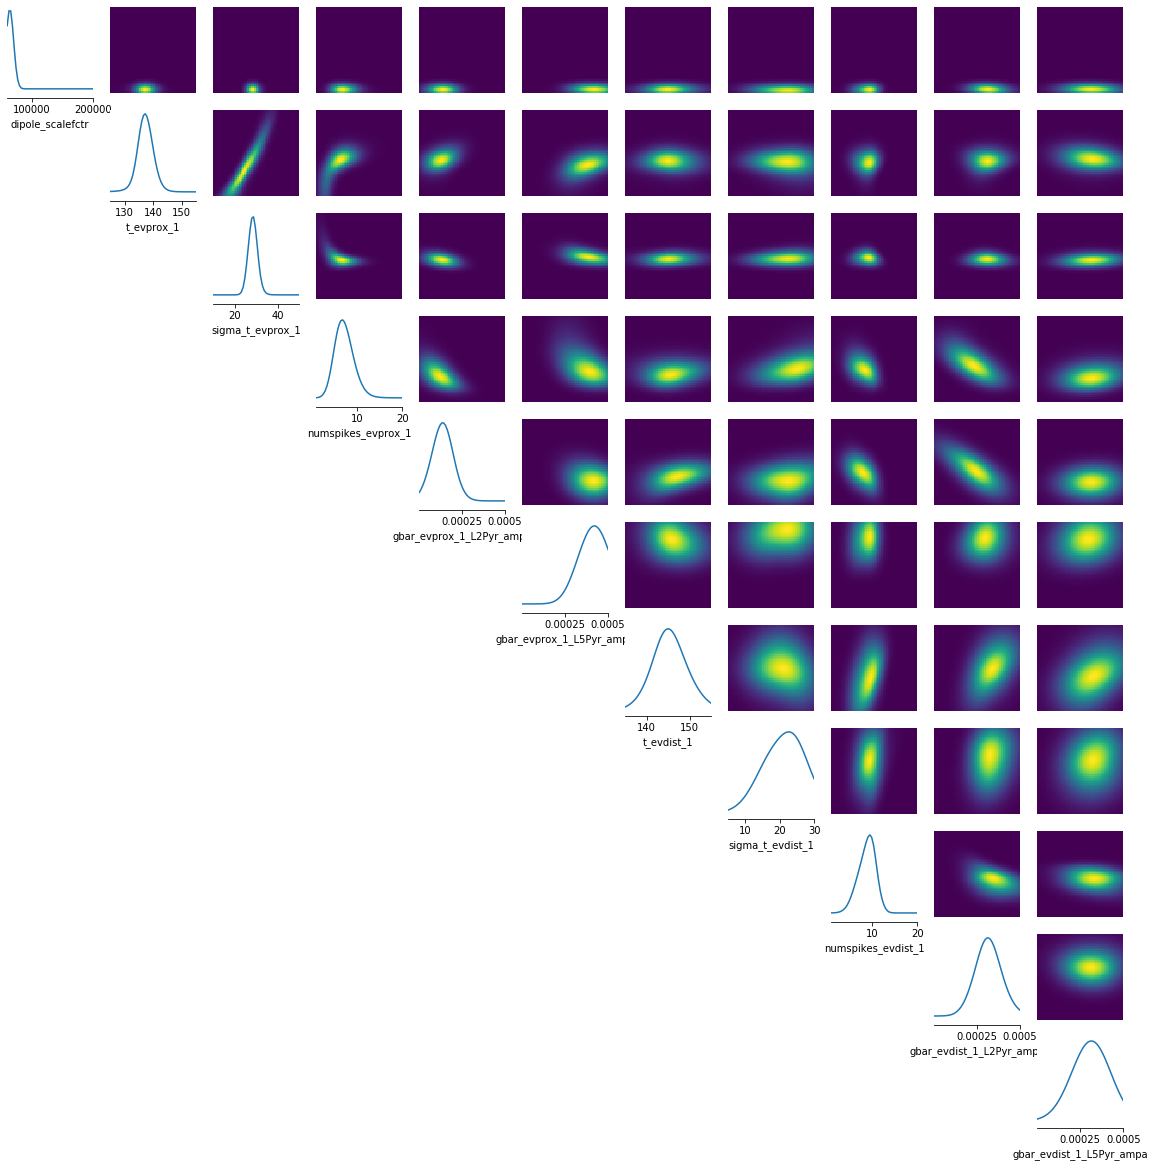

In [6]:
posterior.set_default_x(conv_interp)
_ = utils.conditional_pairplot(density=posterior, condition=condition, fig_size=(20,20), labels=param_names, limits=limits)

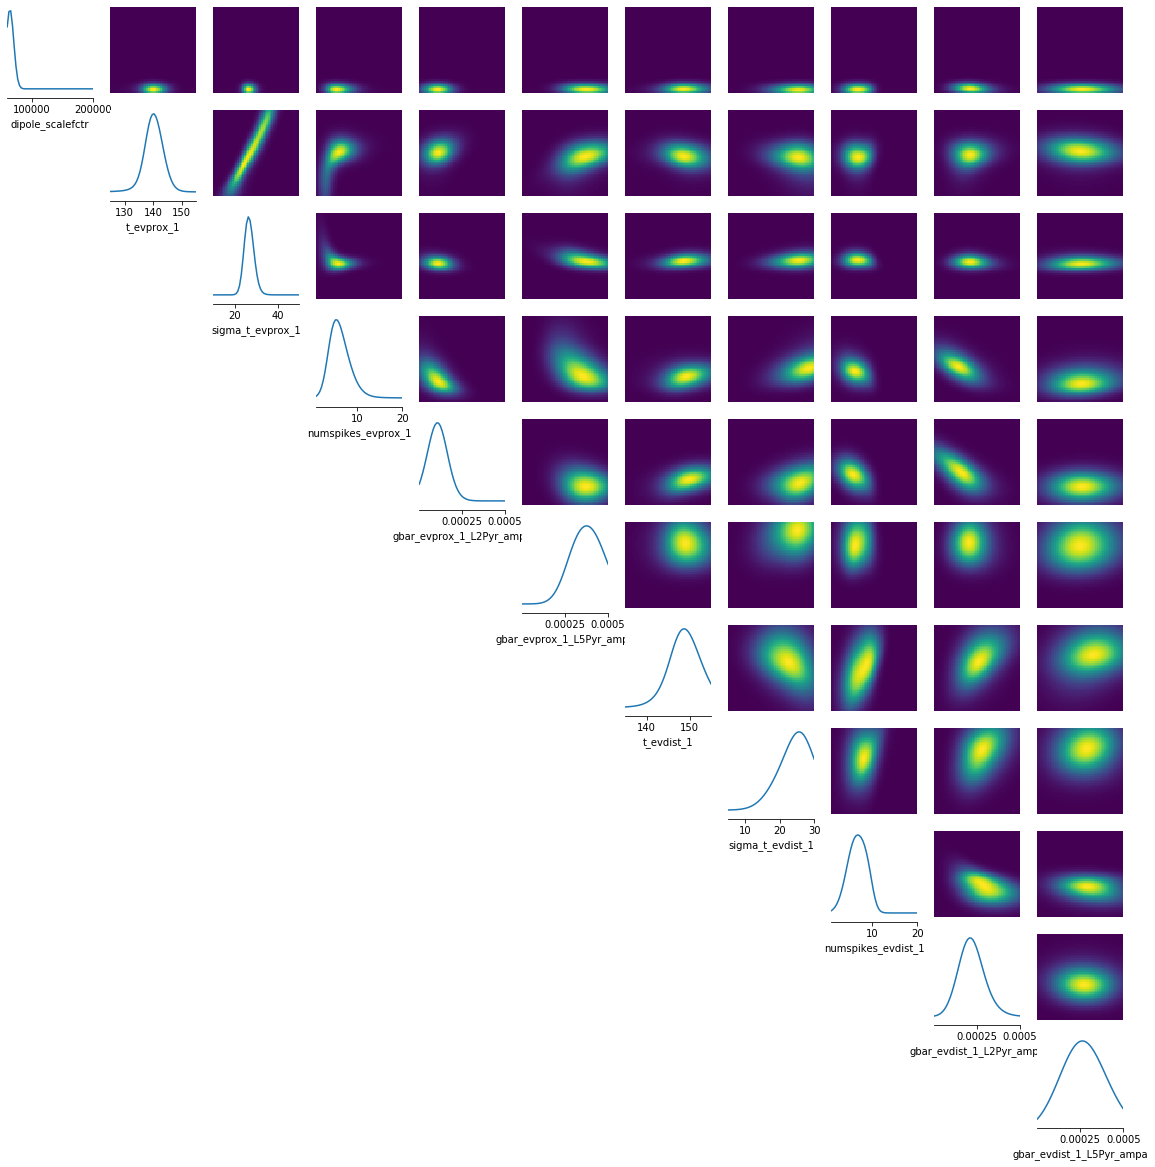

In [7]:
posterior.set_default_x(no_conv_interp)
_ = utils.conditional_pairplot(density=posterior, condition=condition, fig_size=(20,20), labels=param_names, limits=limits)

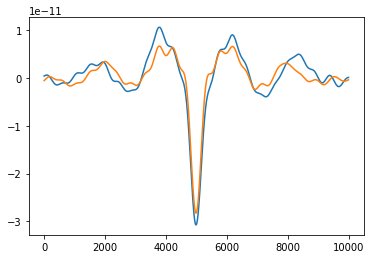

In [40]:
plt.figure()
plt.plot(conv_interp)
plt.plot(no_conv_interp)